## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is another popular unsupervised clustering algorithm. Unlike K-Means, which creates spherical clusters and assigns every point to a cluster, DBSCAN identifies clusters based on the density of data points. It works by grouping together points that are closely packed together, marking as outliers (or noise) points that lie alone in low-density regions. This makes it particularly good at finding arbitrarily shaped clusters and handling noise in the data.

<img src="dbscan1.png" width="600"/>

In this project, our goal is to use DBSCAN to group songs from the Spotify dataset based on their audio features. We will compare the results to K-means and PCA analysis to see what kinds of patterns a density-based approach can find. A key point of interest will be which songs, if any, are identified as "noise" or outliers. 

We will use the following libraries:

1. matplotlib (https://matplotlib.org/)
2. numpy (https://numpy.org/)
3. pandas (https://pandas.pydata.org/)
4. seaborn (https://seaborn.pydata.org/)
5. scikit learn (https://scikit-learn.org/)

We'll start by importing our libraries and loading our dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('talk')

df = pd.read_csv('SpotifyFeatures.csv')

Next we will select the audio features we will be using for clustering. Note that the labels themselves will not be used in the training, but they will help us make sense of the resulting data.

In [5]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now we will compress these down to help with visualization.

In [8]:
pca_2 = PCA(n_components=2)
principal_components = pca_2.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,1.536648,0.017769
1,1.733209,-0.724620
2,-1.718397,-0.105202
3,-1.525501,-0.798694
4,-2.596392,-0.065317


Now we will apply our DBSCAN algorithm to the data.

In [10]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
y_dbscan = dbscan.fit_predict(pca_df)
pca_df['cluster'] = y_dbscan

Now, check the number of clusters that DBSCAN found. -1 denotes noise, so we want to exclude that when clustering.

In [13]:
n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise = list(y_dbscan).count(-1)
print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points found: {n_noise}")

Number of clusters found: 1
Number of noise points found: 18


Now that we're done training, a visualization will help:

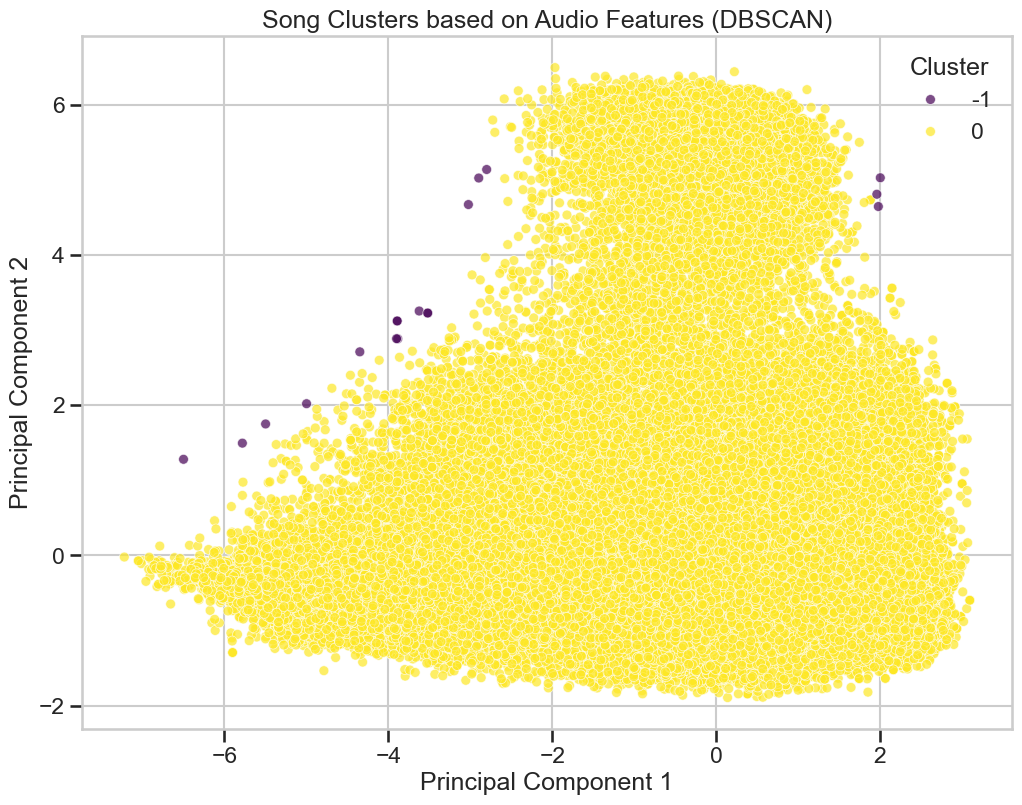

In [12]:
plt.figure(figsize=(12, 9))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=50, alpha=0.7)
plt.title('Song Clusters based on Audio Features (DBSCAN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Based on this result, we find one drawback to DBSCAN. While it is able to find noise points, this comes at the expense of potentially overgrouping our data points. DBSCAN found only 1 cluster, which may make it unfit to analyze this specific dataset for Spotify music files. It's possible each of these files had some element of similarity in them that convinced the model they all should be clustered together.